<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours


### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

In [1]:
## IMPORT LIBRARIES
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
print('Setup Completed')

Setup Completed


## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [2]:
## Read the csv file
airbnb_df = pd.read_csv('./Airbnb_Open_Data.csv', low_memory=False)
print('File read and converted into dataframe')

File read and converted into dataframe


In [3]:
## Display the first 5 rows
airbnb_df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
## Display the data types
airbnb_df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [5]:
## Create list of columns to drop
columns_to_drop = ['host id', 'id', 'country', 'country code', 'lat', 'long', 'house_rules', 'license']

In [6]:
## Drop columns from dataframe and save in new dataframe
airbnb_dropped = airbnb_df.drop(columns_to_drop, axis=1)

In [7]:
airbnb_dropped.head(5)

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


Country, country code, latitude and longitude are related columns, but since all the data is New York-based AirBNB listings, the columns are irrelevant to the analysis. ​ Host ID and ID of the listing are related as well and can be replaced by the name of the listing and differentiated by the host name, thus irrelevant data as well. ​ House rules column is irrelevant data that is subjected to the host or booking. License are all empty fields which has no use in the dataset. ​ Removing irrelevant columns allows the dataset to be more concise and compact for focus in analytical purposes.

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [8]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = airbnb_dropped.isnull().sum().sort_values(ascending=True)

missing_values

room type                             0
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
instant_bookable                    105
number of reviews                   183
Construction year                   214
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
calculated host listings count      319
review rate number                  326
host name                           406
minimum nights                      409
availability 365                    448
reviews per month                 15879
last review                       15893
dtype: int64

In [9]:
# Impute missing values based on column data types
for column in airbnb_dropped.columns:
    if airbnb_dropped[column].dtype == 'object':  # Impute missing values with an empty string for object/string columns
        airbnb_dropped[column].fillna('', inplace=True)
    else:  # Impute missing values with the mean for numeric columns
        airbnb_dropped[column].fillna(airbnb_dropped[column].mean(), inplace=True)
print("Missing values of objects replaced with empty string, and numerical values replace with mean of column.")

Missing values of objects replaced with empty string, and numerical values replace with mean of column.


In [10]:
# Missing value recheck
missing_values = airbnb_dropped.isnull().sum().sort_values(ascending=True)
missing_values

# Output should be all 0

NAME                              0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
neighbourhood                     0
neighbourhood group               0
host name                         0
host_identity_verified            0
calculated host listings count    0
availability 365                  0
dtype: int64

In [11]:
# Check initial number of records.
initial_records = len(airbnb_dropped)
initial_records

102599

In [12]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
duplicates = airbnb_dropped.duplicated().sum()
duplicates

3615

In [13]:
airbnb_dropped.drop_duplicates(inplace=True)
print("Duplicates removed.")

Duplicates removed.


In [14]:
## Display the total number of records in the dataframe after removing the duplicates.
final_records = len(airbnb_dropped)

final_records

98984

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [15]:
## Rename the column.
airbnb_dropped.rename(columns={'availability 365': 'days_booked'}, inplace=True)
print("Column renamed from 'availability 365' to 'days_booked'.")

Column renamed from 'availability 365' to 'days_booked'.


In [16]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
airbnb_dropped.columns = airbnb_dropped.columns.str.lower().str.replace(' ', '_')

# Check column names
column_names = airbnb_dropped.columns.tolist()
column_names

['name',
 'host_identity_verified',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'price',
 'service_fee',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'days_booked']

In [17]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
airbnb_dropped['price'] = airbnb_dropped['price'].str.replace(r'[$,]', '', regex=True)
airbnb_dropped['service_fee'] = airbnb_dropped['service_fee'].str.replace(r'[$,]', '', regex=True)

airbnb_dropped['price'] = pd.to_numeric(airbnb_dropped['price'], errors='coerce').astype(float)
airbnb_dropped['service_fee'] = pd.to_numeric(airbnb_dropped['service_fee'], errors='coerce').astype(float)

airbnb_dropped.head(5)

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,,1.374022,5.0,1.0,352.0
3,,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0




Further data cleaning,
<ul>
    <li>Convert minimum_nights, number_of_reviews, review_rate_number, calculated_host_listings_count, days_booked columns into integer.</li>
    <li>Convert construction_year to timedate year, and last_review to timedate without time.</li>
    <li>Check for neighbourhood and neighbourhood_groups that are misspelt.</li>
</ul>



In [18]:
# Convert the specified columns to integer data type
columns_to_convert = ['minimum_nights', 'number_of_reviews', 'review_rate_number',
                      'calculated_host_listings_count', 'days_booked']

airbnb_dropped[columns_to_convert] = airbnb_dropped[columns_to_convert].astype(int)
print('Columns converted to integer.')

Columns converted to integer.


In [19]:
# Convert 'construction_year' column to datetime year
airbnb_dropped['construction_year'] = pd.to_datetime(airbnb_dropped['construction_year'], format='%Y').dt.year

# Convert 'last_review' column to datetime without time
airbnb_dropped['last_review'] = pd.to_datetime(airbnb_dropped['last_review']).dt.date

# Check data
airbnb_dropped.head(5)

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020,966.0,193.0,10,9,2021-10-19,0.210000,4,6,286
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007,142.0,28.0,30,45,2022-05-21,0.380000,4,2,228
2,THE VILLAGE OF HARLEM....NEW YORK !,,Elise,Manhattan,Harlem,True,flexible,Private room,2005,620.0,124.0,3,0,NaT,1.374022,5,1,352
3,,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005,368.0,74.0,30,270,2019-07-05,4.640000,4,1,322
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009,204.0,41.0,10,9,2018-11-19,0.100000,3,1,289


In [20]:
# Check for misspelled neighbourhoods

# Define a function to clean up neighborhood group names
def clean_neighborhood_group(group):
    # Define the misspelled neighborhood group names and their correct counterparts
    corrections = {
        'brookln': 'Brooklyn',
        'manhatan': 'Manhattan'
    }

    # Create a regex pattern to match the misspelled group names
    pattern = re.compile(r'\b(' + '|'.join(corrections.keys()) + r')\b', re.IGNORECASE)

    # Replace the misspelled group names with their correct counterparts
    cleaned_group = pattern.sub(lambda x: corrections[x.group().lower()], group)

    return cleaned_group

# Clean up the neighborhood group names in the dataframe
airbnb_dropped['neighbourhood_group'] = airbnb_dropped['neighbourhood_group'].apply(clean_neighborhood_group)

group_counts = airbnb_dropped['neighbourhood_group'].unique()

group_counts

array(['Brooklyn', 'Manhattan', 'Queens', '', 'Staten Island', 'Bronx'],
      dtype=object)

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [21]:
## List the count of various room types avaliable with Airbnb
room_type_counts = airbnb_dropped['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    51922
Private room       44803
Shared room         2144
Hotel room           115
Name: count, dtype: int64

In [22]:
## Which room type adheres to more strict cancellation policy
average_cancellation = airbnb_dropped.groupby('room_type')['cancellation_policy'].apply(lambda x: (x == 'strict').mean())

room_type_most_strict = average_cancellation.idxmax()

room_type_most_strict

'Shared room'

In [23]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
airbnb_dropped['price'] = pd.to_numeric(airbnb_dropped['price'], errors='coerce')
average_price_neighbourhood = airbnb_dropped.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

average_price_neighbourhood

neighbourhood
New Dorp                      1045.333333
Chelsea, Staten Island        1042.000000
Fort Wadsworth                1024.000000
Little Neck                    817.750000
Jamaica Hills                  812.904762
                                 ...     
Rossville                      327.500000
Breezy Point                   309.888889
Spuyten Duyvil                 307.000000
Bay Terrace, Staten Island     306.000000
Lighthouse Hill                107.666667
Name: price, Length: 225, dtype: float64

In [24]:
# Remove any empty values of neighbourhood group or neighbourhood which might dispute the analysis later on
airbnb_clean = airbnb_dropped[(airbnb_dropped['neighbourhood_group'] != '') & (airbnb_dropped['neighbourhood'] != '')]

## List the average prices by neighborhood group, sort most expensive to least
average_price_neighbourhood_group = airbnb_clean.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

average_price_neighbourhood_group

neighbourhood_group
Queens           629.626468
Staten Island    627.277412
Bronx            626.864003
Brooklyn         626.427701
Manhattan        622.665031
Name: price, dtype: float64

In [25]:
# Get the most expensive neighborhood
most_expensive_neighbourhood = average_price_neighbourhood.idxmax()
most_expensive_neighbourhood

'New Dorp'

In [26]:
# Get the most expensive neighborhood group
most_expensive_neighbourhood_group = average_price_neighbourhood_group.idxmax()
most_expensive_neighbourhood_group

'Queens'

## Task 5a: Data Visualization (Any Tool)

* List the count of various room types avaliable with Airnb
* Which room type adheres to more strict cancellation policy
* List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [27]:
## List the count of various room types avaliable with Airbnb
room_type_counts = airbnb_dropped['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    51922
Private room       44803
Shared room         2144
Hotel room           115
Name: count, dtype: int64

In [28]:
## Which room type adheres to more strict cancellation policy
# Get the percertages of room type for each of the cancellation_policy types
airbnb_cancellation = airbnb_clean[['room_type','cancellation_policy']]
airbnb_cancellation_room = airbnb_cancellation.groupby('room_type').value_counts(normalize=True)*100
print('Cancellation policy distribution by room type [%]:\n{}'.format(airbnb_cancellation_room))

# Make it easier to compare the percentages by taking the maximum of each cancellation_policy type
max_airbnb_cancellation = airbnb_cancellation_room.groupby(level='cancellation_policy').idxmax()
print('\nMaximum values for each room cancellation policy:\n{}'.format(max_airbnb_cancellation.values))


Cancellation policy distribution by room type [%]:
room_type        cancellation_policy
Entire home/apt  flexible               33.400771
                 moderate               33.352601
                 strict                 33.154143
                                         0.092486
Hotel room       flexible               38.260870
                 moderate               32.173913
                 strict                 29.565217
Private room     moderate               33.640018
                 strict                 33.269317
                 flexible               33.041536
                                         0.049129
Shared room      strict                 33.442164
                 moderate               33.255597
                 flexible               33.162313
                                         0.139925
Name: proportion, dtype: float64

Maximum values for each room cancellation policy:
[('Shared room', '') ('Hotel room', 'flexible')
 ('Private room', 'moderate') 

Conclusion: The room type witch adheres to the most strict cancellation policy is the shared room.

In [29]:
# Prices by neighbourhood group
print('Prices by neighbourhood group:')
print(airbnb_clean.groupby('neighbourhood_group')['price'].value_counts().head())

# To find out which is the most expensive neighbourhood group, we can use the median as a good method of measuring the price 
print('\nMedian price by neighbourhood group:')
print(airbnb_dropped.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False))

Prices by neighbourhood group:
neighbourhood_group  price 
Bronx                531.0     11
                     827.0     10
                     100.0     10
                     852.0      9
                     1049.0     9
Name: count, dtype: int64

Median price by neighbourhood group:
neighbourhood_group
                 661.0
Bronx            630.0
Staten Island    630.0
Queens           627.0
Brooklyn         626.0
Manhattan        621.0
Name: price, dtype: float64


In [30]:
# Top 10 most expensive neighbourhoods
top_10 = average_price_neighbourhood.head(10)
top_10

neighbourhood
New Dorp                  1045.333333
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Shore Acres                805.142857
Arden Heights              804.888889
Midland Beach              796.176471
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64

<Figure size 1000x800 with 0 Axes>

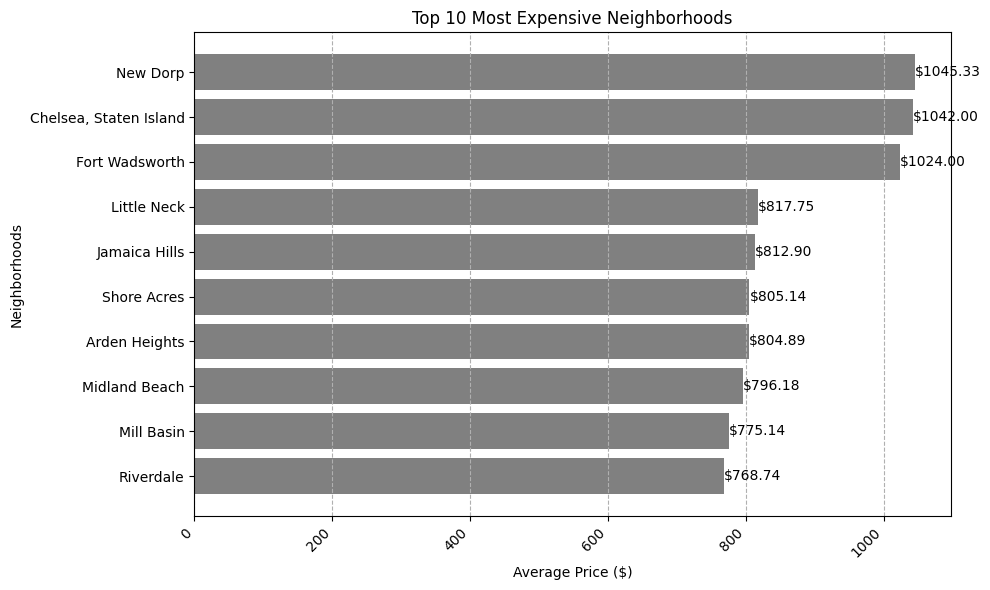

In [31]:
# Display horizontal bar chart using seaborn
plt.figure(figsize=(10, 8))
plt.figure(figsize=(10, 6))
plt.barh(top_10.index, top_10.values, color='grey')

# Add Labels
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhoods')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.gca().invert_yaxis()  # Invert the y-axis to display highest price at the top

# Add details
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')

# Add data labels to the bars
for index, value in enumerate(top_10.values):
    plt.text(value, index, f'${value:.2f}', va='center')

# Display Chart
plt.tight_layout()
plt.show()

In [32]:
# Display the 10 cheapest neighborhoods
bottom_10 = average_price_neighbourhood.tail(10)
bottom_10

neighbourhood
Oakwood                       469.307692
West Farms                    463.166667
Emerson Hill                  443.800000
Castleton Corners             417.230769
Richmondtown                  373.400000
Rossville                     327.500000
Breezy Point                  309.888889
Spuyten Duyvil                307.000000
Bay Terrace, Staten Island    306.000000
Lighthouse Hill               107.666667
Name: price, dtype: float64

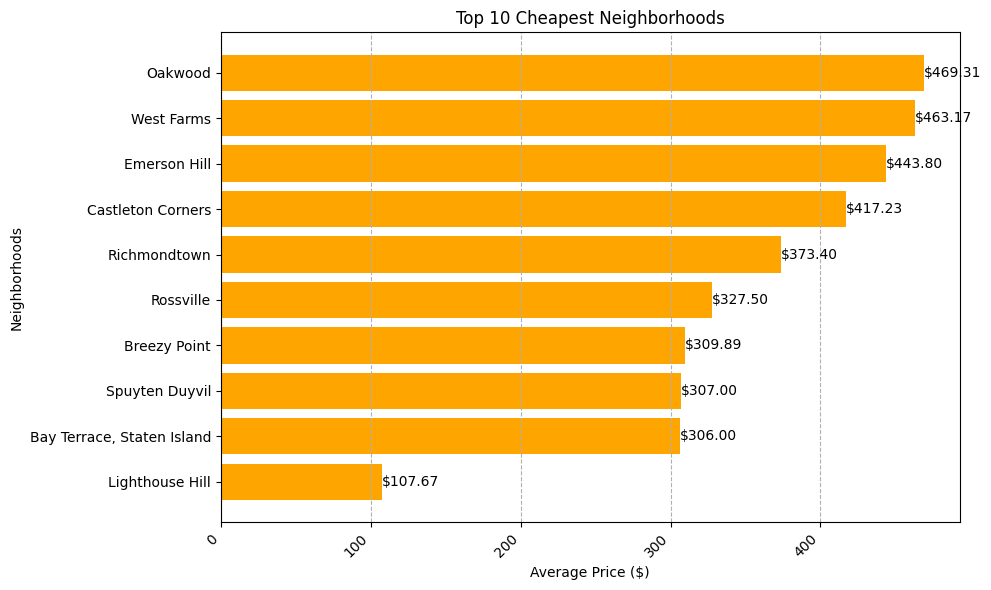

In [33]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(bottom_10.index, bottom_10.values, color='orange')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhoods')
plt.title('Top 10 Cheapest Neighborhoods')
plt.gca().invert_yaxis()  # Invert the y-axis to display lowest price at the bottom

# Add details
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')

# Add data labels to the bars
for index, value in enumerate(bottom_10.values):
    plt.text(value, index, f'${value:.2f}', va='center')

# Display Chart
plt.tight_layout()
plt.show()

In [34]:
airbnb_dropped['price'] = pd.to_numeric(airbnb_dropped['price'], errors='coerce')
average_price_room_type = airbnb_dropped.groupby('room_type')['price'].mean().sort_values(ascending=False)

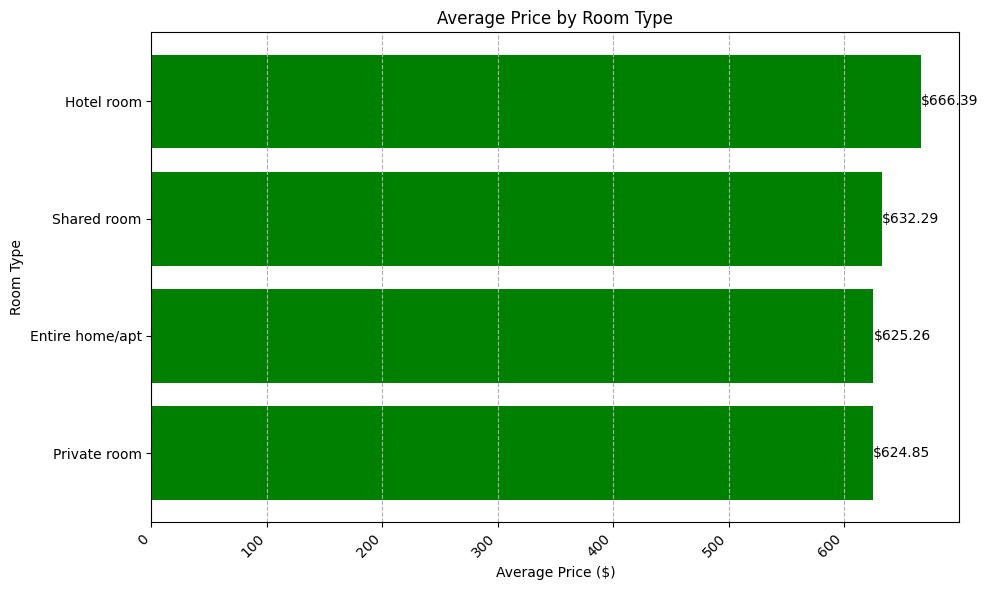

In [35]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(average_price_room_type.index, average_price_room_type.values, color='green')
plt.xlabel('Average Price ($)')
plt.ylabel('Room Type')
plt.title('Average Price by Room Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display lowest price at the bottom

# Add details
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')

# Add data labels to the bars
for index, value in enumerate(average_price_room_type.values):
    plt.text(value, index, f'${value:.2f}', va='center')

# Display Chart
plt.tight_layout()
plt.show()

In [36]:
average_days_booked_neighbourhood = airbnb_clean.groupby('neighbourhood_group')['days_booked'].sum().sort_values(ascending=False)

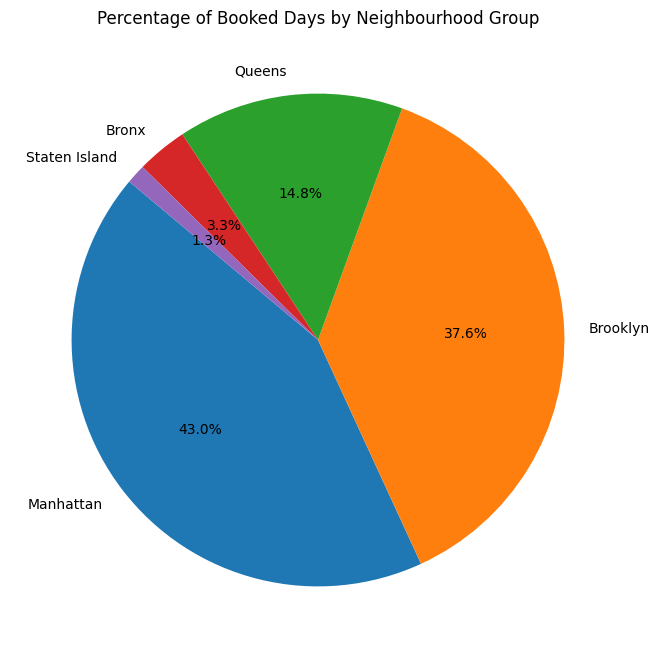

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(average_days_booked_neighbourhood.values, labels=average_days_booked_neighbourhood.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Booked Days by Neighbourhood Group')
plt.show()

## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

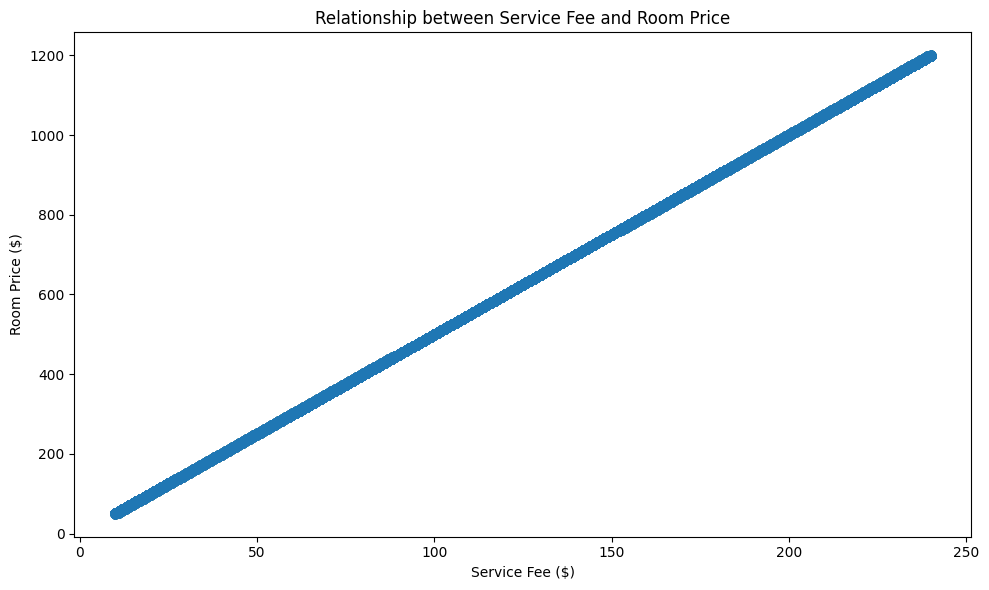

In [38]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(airbnb_clean['service_fee'], airbnb_clean['price'], alpha=0.5)

# Add details
plt.xlabel('Service Fee ($)')
plt.ylabel('Room Price ($)')
plt.title('Relationship between Service Fee and Room Price')

# Show chart
plt.tight_layout()
plt.show()

In [39]:
# Filter out rows where 'days_booked' is more than 0
filter_airbnb = airbnb_clean[(airbnb_clean['days_booked'] >= 0)]

# Calculate the average listings per year based on the difference between the current year and 'year_constructed'
current_year = pd.Timestamp.now().year
filter_airbnb['years_constructed'] = current_year - filter_airbnb['construction_year']
listings_per_year = filter_airbnb.groupby('years_constructed')['days_booked'].mean()

C:\Users\devto\AppData\Local\Temp\ipykernel_12348\2153861261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_airbnb['years_constructed'] = current_year - filter_airbnb['construction_year']


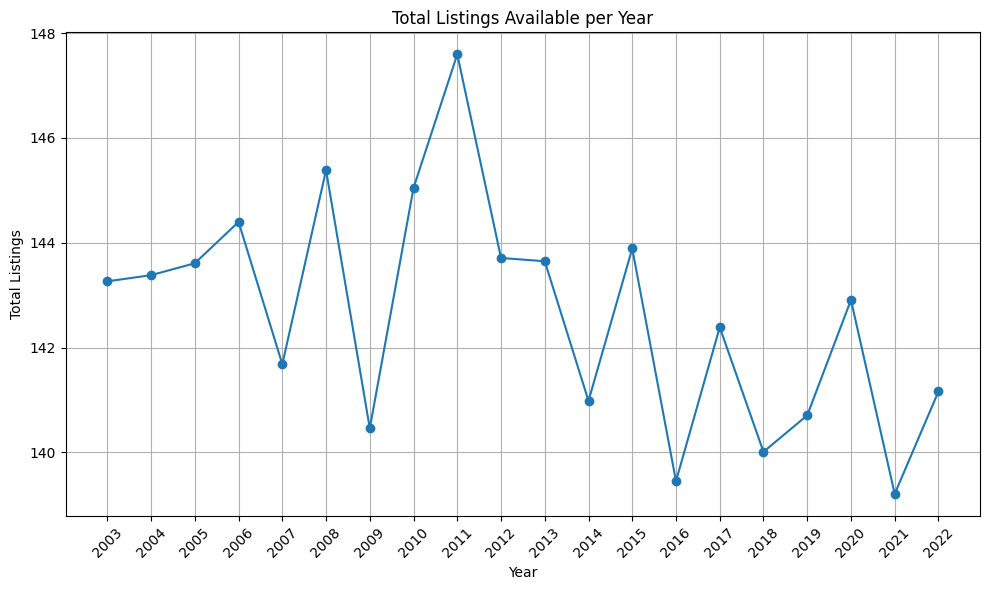

In [40]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(listings_per_year.index, listings_per_year.values, marker='o', linestyle='-')
plt.xticks(rotation=45)

# Add labels
plt.xlabel('Year')
plt.ylabel('Total Listings')
plt.title('Total Listings Available per Year')
plt.xticks(listings_per_year.index, [f"{current_year - year}" for year in listings_per_year.index]) #show the year, instead of years from current
plt.gca().invert_xaxis()
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()

## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

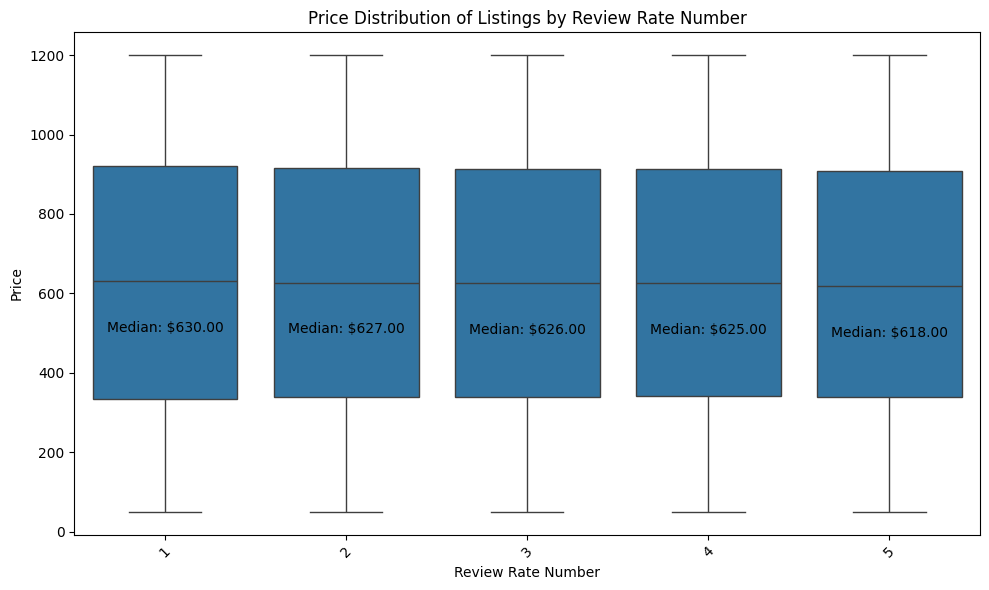

In [41]:
# Create a box and whisker chart
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='review_rate_number', y='price', data=airbnb_clean)
plt.xlabel('Review Rate Number')
plt.ylabel('Price')
plt.title('Price Distribution of Listings by Review Rate Number')
plt.xticks(rotation=45)

# Add label for median
medians = airbnb_clean.groupby('review_rate_number')['price'].median()
room_types = airbnb_clean['review_rate_number'].unique()

for xtick, label in enumerate(ax.get_xticklabels()):
    review_rate = int(label.get_text())
    
    # Calcola il prezzo mediano solo se ci sono valori validi
    if review_rate in medians.index:
        median_price = medians[review_rate]
        ax.text(xtick, median_price - 100, f"Median: ${median_price:.2f}", ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()

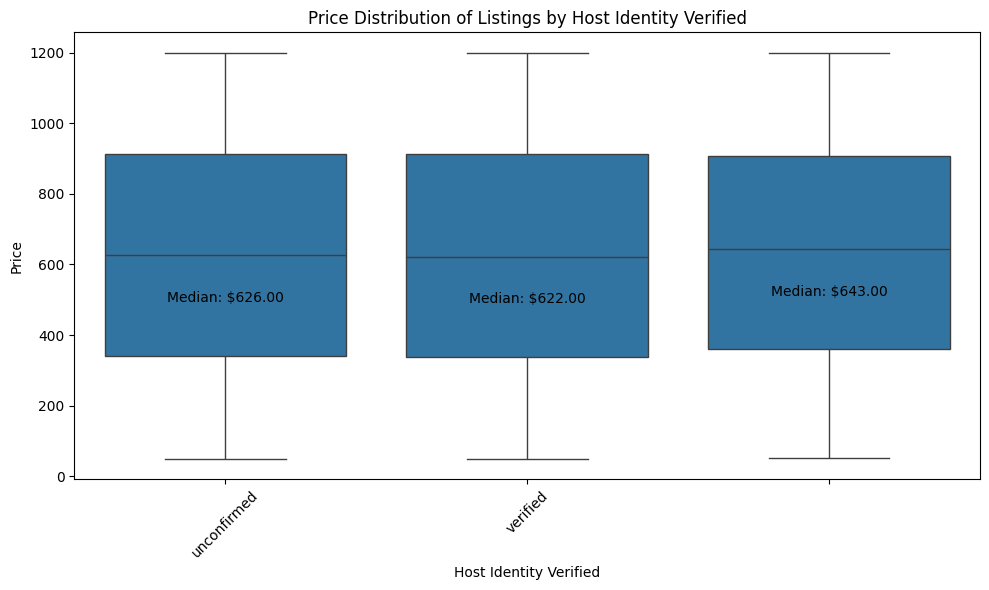

In [42]:
# Create a box and whisker chart
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='host_identity_verified', y='price', data=airbnb_clean)
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.title('Price Distribution of Listings by Host Identity Verified')
plt.xticks(rotation=45)

# Add label for median
medians = airbnb_clean.groupby('host_identity_verified')['price'].median()
room_types = airbnb_clean['host_identity_verified'].unique()

for xtick, label in enumerate(ax.get_xticklabels()):
    median_price = airbnb_clean.loc[airbnb_clean['host_identity_verified'] == label.get_text(), 'price'].median()
    ax.text(xtick, median_price - 100, f"Median: ${median_price:.2f}", ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()